# Big mart sales Prediction

## Importing libraries

In [27]:
import pandas as pd
import numpy as np
import matplotlib as plt
import pickle
import warnings
warnings.filterwarnings('ignore')

## Loading the dataset

In [29]:
df=pd.read_csv("Train.csv",header=0, sep=',',encoding='Latin1')

In [30]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [31]:
#information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [32]:
#Number of datapoints
df.shape

(8523, 12)

## Cleaning the dataset

## handling the missing values 

In [33]:
#checking for null values
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [34]:
#Finding Mean
df['Item_Weight'].mean()

12.857645184135976

In [35]:
#Filling the missing values of "Item_Weight" with mean 
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)

In [36]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [37]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [38]:
#Filling the missing values of "Outlet_size"
df.Outlet_Size = df.Outlet_Size.fillna('Medium')

In [39]:
#checking of the null values
df.apply(lambda x: sum(x.isnull()))

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [40]:
#getting the information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [41]:
#check for null values
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Univariate Analysis

(array([ 483.,  870.,  865.,  664., 2242.,  629.,  755.,  735.,  677.,
         603.]),
 array([ 4.555 ,  6.2345,  7.914 ,  9.5935, 11.273 , 12.9525, 14.632 ,
        16.3115, 17.991 , 19.6705, 21.35  ]),
 <BarContainer object of 10 artists>)

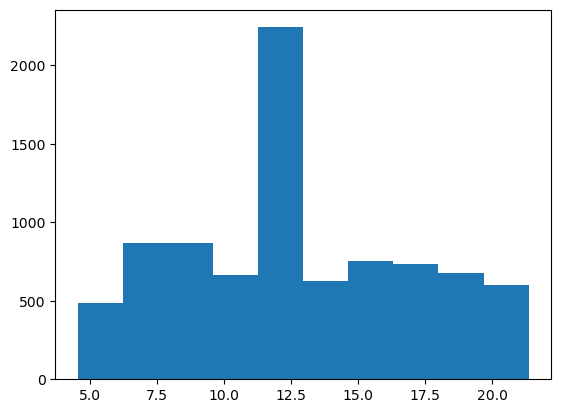

In [43]:
#Item_weight Distributions
plt.hist(df['Item_Weight'])

(array([2639., 2329., 1563.,  979.,  593.,  279.,   60.,   35.,   29.,
          17.]),
 array([0.        , 0.03283909, 0.06567819, 0.09851728, 0.13135638,
        0.16419547, 0.19703457, 0.22987366, 0.26271276, 0.29555185,
        0.32839095]),
 <BarContainer object of 10 artists>)

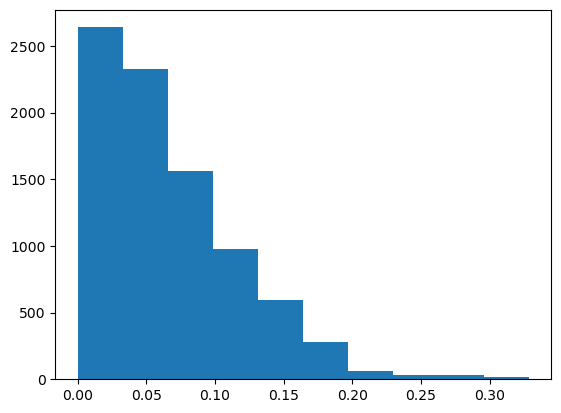

In [44]:
#Item_visibility Distributions
plt.hist(df['Item_Visibility'])

(array([ 923.,  573., 1053., 1248.,  804., 1098., 1200.,  480.,  557.,
         587.]),
 array([ 31.29   ,  54.84984,  78.40968, 101.96952, 125.52936, 149.0892 ,
        172.64904, 196.20888, 219.76872, 243.32856, 266.8884 ]),
 <BarContainer object of 10 artists>)

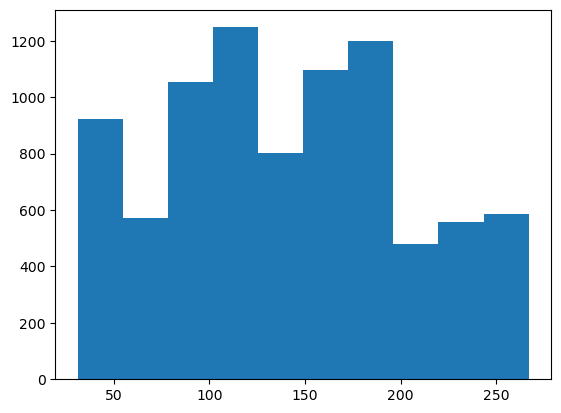

In [45]:
#Item_MRP Distributions
plt.hist(df['Item_MRP'])

(array([3.280e+03, 2.448e+03, 1.527e+03, 7.290e+02, 3.590e+02, 1.240e+02,
        3.600e+01, 1.600e+01, 2.000e+00, 2.000e+00]),
 array([   33.29   ,  1338.65748,  2644.02496,  3949.39244,  5254.75992,
         6560.1274 ,  7865.49488,  9170.86236, 10476.22984, 11781.59732,
        13086.9648 ]),
 <BarContainer object of 10 artists>)

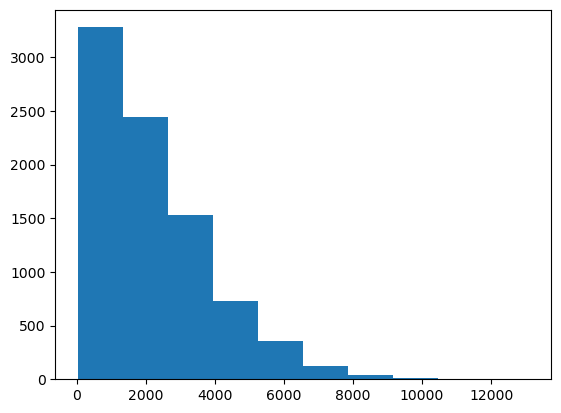

In [46]:
#Item_Outlet_Sales Distributions
plt.hist(df['Item_Outlet_Sales'])

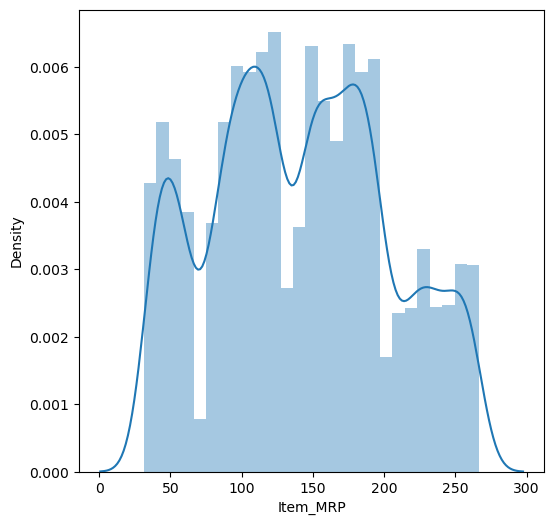

In [47]:
#Item_MRP using distplot Distributions
plt.figure(figsize=(6,6))
sns.distplot(df['Item_MRP'])
plt.show()

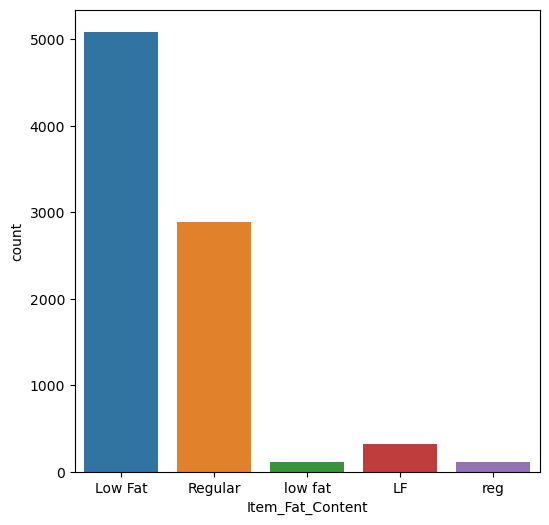

In [48]:
#Item_Fat_Content Distributions
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content', data=df)
plt.show()

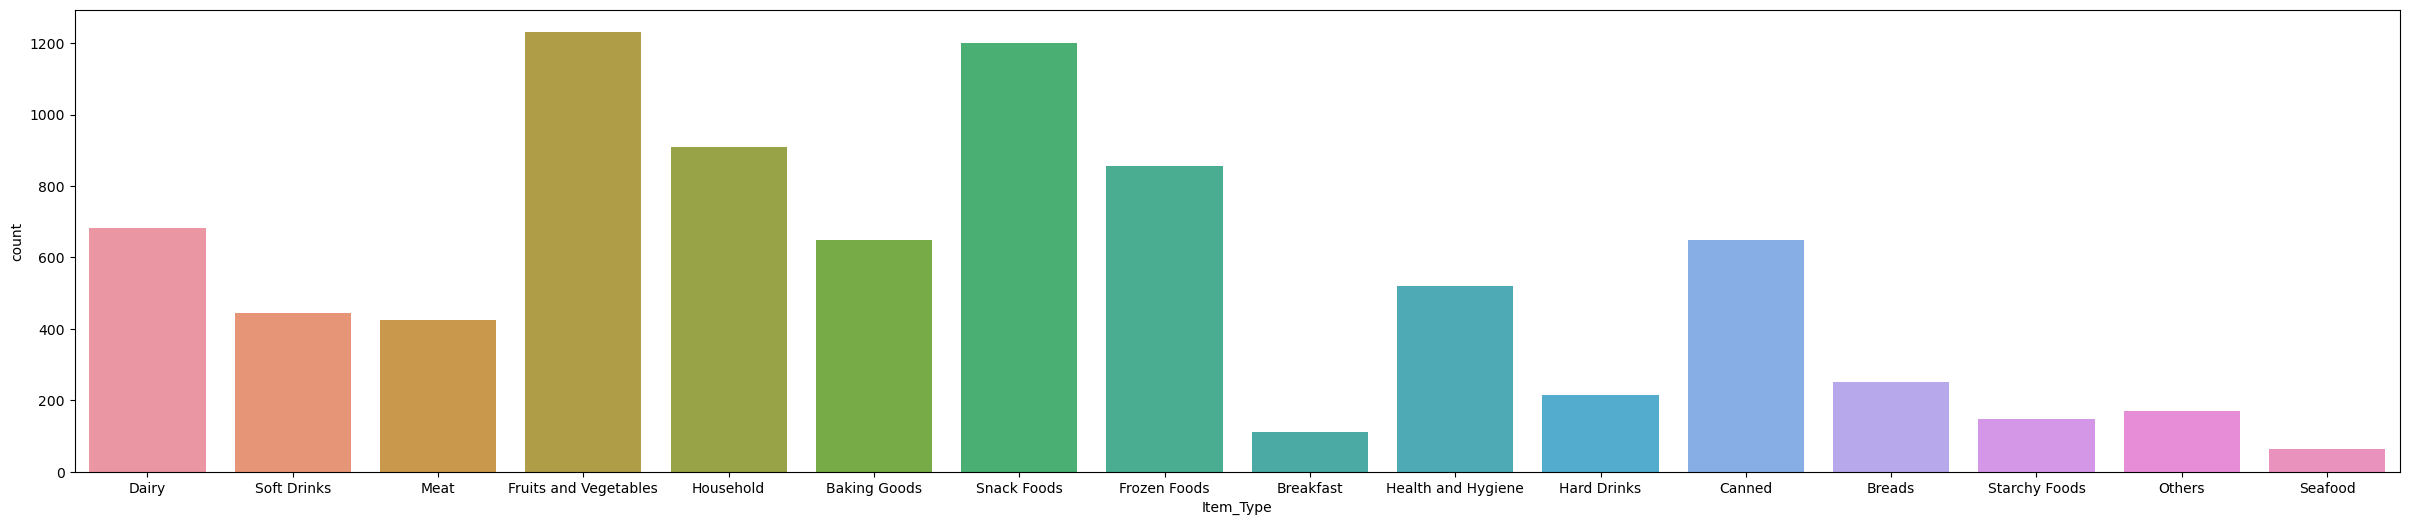

In [49]:
# Item_Type distribution
plt.figure(figsize=(30,6))
sns.countplot(x='Item_Type', data=df)
plt.show()

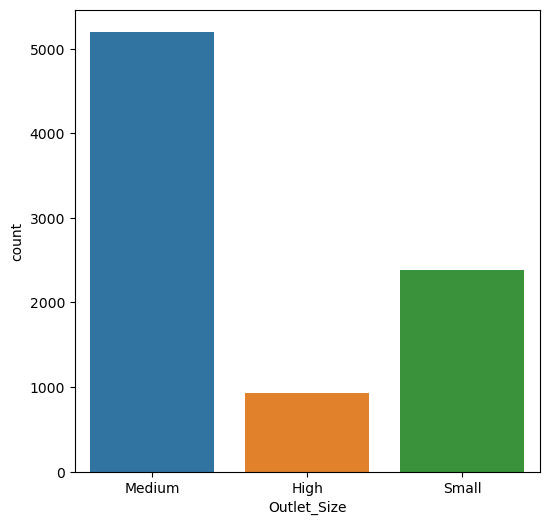

In [50]:
#Outlet_Size Distributions
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Size', data=df)
plt.show()

## Bivariate Analysis

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='Item_Outlet_Sales'>

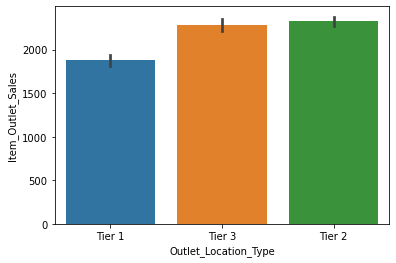

In [24]:
sns.barplot(df.Outlet_Location_Type,df.Item_Outlet_Sales)

<AxesSubplot:xlabel='Item_Type', ylabel='count'>

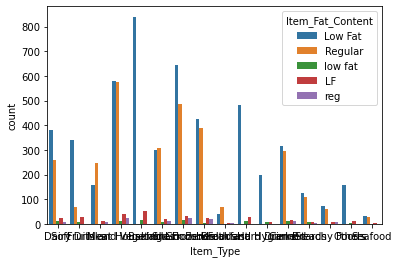

In [25]:
sns.countplot(df['Item_Type'],hue=df['Item_Fat_Content'])

## Multi-variate Analysis

<AxesSubplot:>

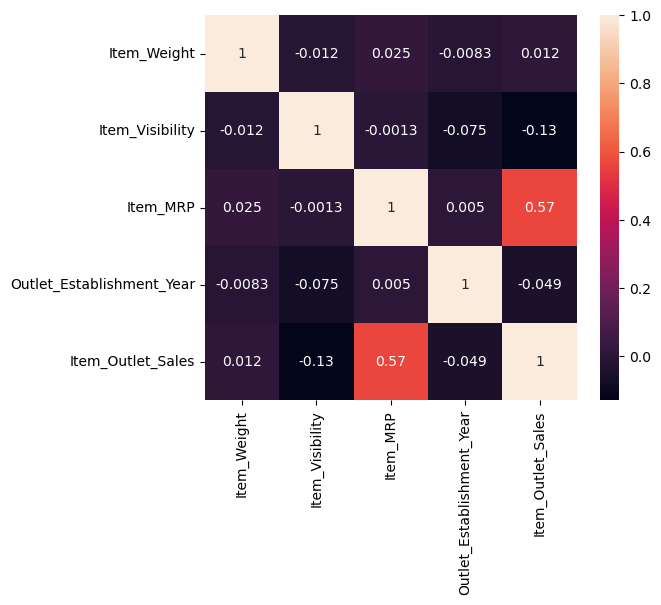

In [51]:
plt.figure(figsize = (6,5))
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:>

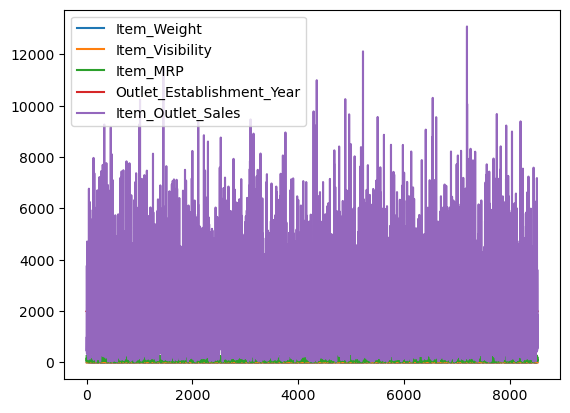

In [52]:
df.plot.line()

array([[<AxesSubplot:title={'center':'Item_Weight'}>,
        <AxesSubplot:title={'center':'Item_Visibility'}>],
       [<AxesSubplot:title={'center':'Item_MRP'}>,
        <AxesSubplot:title={'center':'Outlet_Establishment_Year'}>],
       [<AxesSubplot:title={'center':'Item_Outlet_Sales'}>,
        <AxesSubplot:>]], dtype=object)

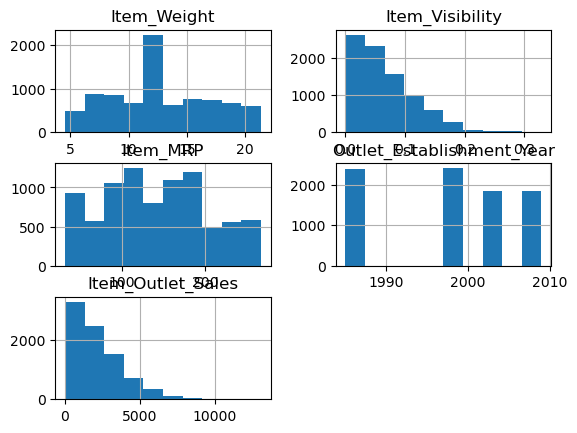

In [53]:
df.hist()

## Descriptive analysis

In [54]:
#Describe of the dataframe
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## Datapreprocessing

# Finding outliers

<AxesSubplot:xlabel='Item_Weight'>

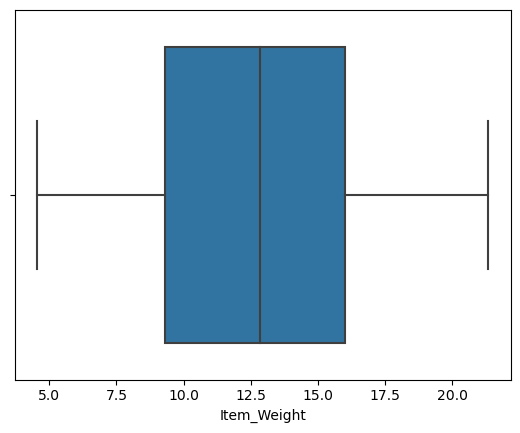

In [55]:
sns.boxplot(x=df['Item_Weight'])

<AxesSubplot:ylabel='Density'>

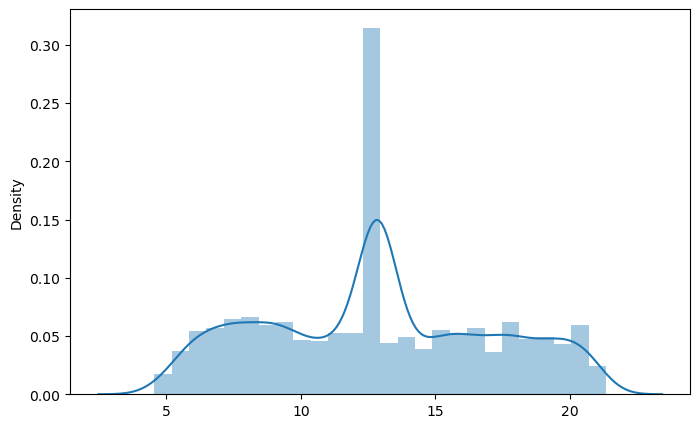

In [56]:
import seaborn as sns
plt.figure(figsize=(8,5))
sns.distplot(x=df['Item_Weight'])

In [57]:
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [58]:
df.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}}, inplace=True)

In [59]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

## Label Encoding

In [64]:
from sklearn.preprocessing import LabelEncoder

In [67]:
encoder=LabelEncoder()

In [68]:
print(encoder)

LabelEncoder()


In [69]:
df['Item_Identifier'] = encoder.fit_transform(df['Item_Identifier'])

df['Item_Fat_Content'] = encoder.fit_transform(df['Item_Fat_Content'])

df['Item_Type'] = encoder.fit_transform(df['Item_Type'])

df['Outlet_Identifier'] = encoder.fit_transform(df['Outlet_Identifier'])

df['Outlet_Size'] = encoder.fit_transform(df['Outlet_Size'])

df['Outlet_Location_Type'] = encoder.fit_transform(df['Outlet_Location_Type'])

df['Outlet_Type'] = encoder.fit_transform(df['Outlet_Type'])

In [70]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


## Splitting the Dataset

In [77]:
X=df.drop('Item_Outlet_Sales',axis=1)

In [79]:
Y=df['Item_Outlet_Sales']

In [73]:
#Export of the train and test dataset
train.to_csv('train.csv',encoding='utf-8',index=False)
test.to_csv('test.csv',encoding='utf-8',index=False)

In [80]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, random_state=101, test_size=0.2)

## Standardization

In [81]:
X.describe()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,779.714889,12.857645,0.352693,0.066132,7.226681,140.992782,4.722281,1997.831867,1.170832,1.112871,1.201220
std,449.222377,4.226124,0.477836,0.051598,4.209990,62.275067,2.837201,8.371760,0.600327,0.812757,0.796459
min,0.000000,4.555000,0.000000,0.000000,0.000000,31.290000,0.000000,1985.000000,0.000000,0.000000,0.000000
25%,395.500000,9.310000,0.000000,0.026989,4.000000,93.826500,2.000000,1987.000000,1.000000,0.000000,1.000000
50%,783.000000,12.857645,0.000000,0.053931,6.000000,143.012800,5.000000,1999.000000,1.000000,1.000000,1.000000
75%,1167.000000,16.000000,1.000000,0.094585,10.000000,185.643700,7.000000,2004.000000,2.000000,2.000000,1.000000
max,1558.000000,21.350000,1.000000,0.328391,15.000000,266.888400,9.000000,2009.000000,2.000000,2.000000,3.000000


In [82]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()


In [83]:
X_train_std= sc.fit_transform(X_train)  # learning how the data is in X train and then transforming

In [84]:
X_test_std= sc.transform(X_test)

In [85]:
X_train_std

array([[ 0.59264645,  1.52290029, -0.74155088, ..., -1.95699503,
         1.08786619, -0.25964107],
       [-1.50626006, -1.23985603, -0.74155088, ..., -0.28872895,
        -0.13870429, -0.25964107],
       [-0.23049765,  1.54667616,  1.34852514, ..., -0.28872895,
        -0.13870429, -0.25964107],
       ...,
       [ 1.44241516, -0.08197107, -0.74155088, ...,  1.37953713,
        -1.36527477, -0.25964107],
       [ 0.81008074, -0.74888428,  1.34852514, ..., -0.28872895,
        -0.13870429, -0.25964107],
       [ 1.114045  ,  0.67885683, -0.74155088, ..., -0.28872895,
         1.08786619,  0.98524841]])

In [86]:
X_test_std

array([[ 1.39360338, -0.43860915, -0.74155088, ..., -0.28872895,
         1.08786619,  0.98524841],
       [ 0.7146759 ,  1.22570189, -0.74155088, ..., -1.95699503,
         1.08786619, -0.25964107],
       [ 0.3419314 , -1.21845775,  1.34852514, ...,  1.37953713,
        -1.36527477, -0.25964107],
       ...,
       [ 1.38250979,  0.65508096, -0.74155088, ..., -0.28872895,
         1.08786619, -1.50453056],
       [ 1.23385574,  1.01171904, -0.74155088, ..., -0.28872895,
         1.08786619,  0.98524841],
       [ 0.37299344, -1.56558548,  1.34852514, ..., -0.28872895,
        -0.13870429, -0.25964107]])

In [87]:
Y_train

3684     163.7868
1935    1607.2412
5142    1510.0344
4978    1784.3440
2299    3558.0352
          ...    
599     5502.8370
5695    1436.7964
8006    2167.8448
1361    2700.4848
1547     829.5868
Name: Item_Outlet_Sales, Length: 6818, dtype: float64

In [88]:
Y_test

8179     904.8222
8355    2795.6942
3411    1947.4650
7089     872.8638
6954    2450.1440
          ...    
1317    1721.0930
4996     914.8092
531      370.1848
3891    1358.2320
6629    2418.1856
Name: Item_Outlet_Sales, Length: 1705, dtype: float64

## Model Building

## Linear Regression

In [89]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()

In [90]:
lr.fit(X_train_std,Y_train)

LinearRegression()

In [91]:
Y_pred_lr=lr.predict(X_test_std)

In [92]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
r2_score(Y_test,Y_pred_lr)

0.5074371891528653

In [93]:
print(r2_score(Y_test,Y_pred_lr))
print(mean_absolute_error(Y_test,Y_pred_lr))
print(np.sqrt(mean_squared_error(Y_test,Y_pred_lr)))

0.5074371891528653
879.0919280574786
1158.6256154462144


## Random Forest Regressor 

In [94]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor()

In [95]:
rf.fit(X_train_std,Y_train)
Y_pred_rf= rf.predict(X_test_std)
r2_score(Y_test,Y_pred_rf)

0.5478467409191194

In [96]:
print(r2_score(Y_test,Y_pred_rf))
print(mean_absolute_error(Y_test,Y_pred_rf))
print(np.sqrt(mean_squared_error(Y_test,Y_pred_rf)))

0.5478467409191194
784.5382877818183
1110.082226340674


## XGBoosting Regressor 

In [98]:
from xgboost import XGBRegressor
from sklearn.metrics import precision_recall_fscore_support as score
# Hyperparameter tuning
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV, RandomizedSearchCV

In [99]:
xg= XGBRegressor()
xg.fit(X_train_std, Y_train)
Y_pred_xg= xg.predict(X_test_std)
r2_score(Y_test,Y_pred_xg)

0.5279411640520251

In [100]:
print(r2_score(Y_test,Y_pred_xg))
print(mean_absolute_error(Y_test,Y_pred_xg))
print(np.sqrt(mean_squared_error(Y_test,Y_pred_xg)))

0.5279411640520251
821.8143855192606
1134.254163119689


## Hyper Parameter Tuning on XGB 

In [101]:
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
model = XGBRegressor()
n_estimators = [10, 100, 1000]
max_depth=range(1,31)
min_samples_leaf=np.linspace(0.1, 1.0)
max_features=["auto", "sqrt", "log2"]
min_samples_split=np.linspace(0.1, 1.0, 10)

# define grid search
grid = dict(n_estimators=n_estimators)


grid_search_forest = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, 
                           scoring='r2',error_score=0,verbose=2,cv=2)

grid_search_forest.fit(X_train_std, Y_train)

# summarize results
print(f"Best: {grid_search_forest.best_score_:.3f} using {grid_search_forest.best_params_}")
means = grid_search_forest.cv_results_['mean_test_score']
stds = grid_search_forest.cv_results_['std_test_score']
params = grid_search_forest.cv_results_['params']

for mean, stdev, param in zip(means, stds, params):
    print(f"{mean:.3f} ({stdev:.3f}) with: {param}")

Fitting 2 folds for each of 3 candidates, totalling 6 fits
Best: 0.574 using {'n_estimators': 10}
0.574 (0.002) with: {'n_estimators': 10}
0.496 (0.010) with: {'n_estimators': 100}
0.444 (0.017) with: {'n_estimators': 1000}


In [102]:
grid_search_forest.best_params_

{'n_estimators': 10}

In [103]:
grid_search_forest.best_score_

0.5740234075785926

In [104]:
Y_pred_xg_grid=grid_search_forest.predict(X_test_std)

In [105]:
r2_score(Y_test,Y_pred_xg_grid)

0.5980159101766884

## saving model

In [63]:
filename = 'model.pkl'
pickle.dump(Y_pred_xg_grid, open(filename, 'wb'))